In [54]:
#假設P>=0.5時，預測的結果為1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#测试样本的数量
parameter=40

In [55]:
data=pd.DataFrame(index=range(0,parameter),columns=('probability','The true label'))
data['The true label']=np.random.randint(0,2,size=len(data))
data['probability']=np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))

In [56]:
data

,probability,The true label
0,0.9,0
1,0.2,0
2,0.3,0
3,0.3,0
4,0.7,0
5,0.3,1
6,0.7,1
7,0.6,1
8,0.3,0
9,0.9,1


In [57]:
cm=np.arange(4).reshape(2,2)

cm[0,0]=len(data[data['The true label']==0][data['probability']<0.5])
 #TN
cm[0,1]=len(data[data['The true label']==0][data['probability']>=0.5])#FP
cm[1,0]=len(data[data['The true label']==1][data['probability']<0.5]) #FN
cm[1,1]=len(data[data['The true label']==1][data['probability']>=0.5])#TP

#ROC畫圖需要設定threshold，這是threshold為50%的情況下的cm樣子
cm

C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


array([[12,  9],
       [ 8, 11]])

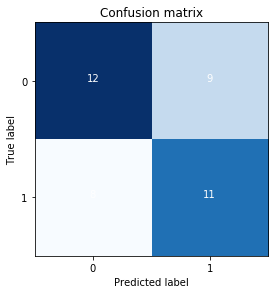

In [58]:
import itertools
classes = [0,1]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in  itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
#threshold=0.5上的假正率和真正率容易计算，为： FPR=6/(5+6)=0.55，TPR=13/(13+6)=0.68
#ROC曲线是一系列threshold下的（FPR，TPR）数值点的连线
#此时的threshold的取值分别为测试数据集中各样本的预测概率
#取各个概率的顺序是从大到小的。

In [34]:
print("原本:",data)
data.sort_values('probability',inplace=True,ascending=False)
print("之後:",data)

原本:     probability  The true label
30          0.9               0
2           0.9               0
36          0.9               1
5           0.9               1
33          0.9               0
21          0.9               1
23          0.9               1
19          0.8               1
29          0.8               1
37          0.7               0
34          0.7               1
7           0.7               0
14          0.6               1
18          0.6               0
39          0.6               0
13          0.6               1
28          0.6               1
31          0.6               1
22          0.6               1
27          0.5               0
24          0.5               1
20          0.5               1
0           0.4               0
16          0.4               1
25          0.4               0
26          0.4               1
15          0.4               0
38          0.4               1
3           0.4               0
4           0.4               0
35  

In [63]:
TPRandFPR=pd.DataFrame(index=range(len(data)),columns=('TP','FP'))

for j in range(len(data)):
    data1=data.head(n=j+1)
    FP=len(data1[data1['The true label']==0] [data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==0]))
    
    TP=len(data1[data1['The true label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==1])) 
    TPRandFPR.iloc[j]=[TP,FP]


C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\gpu\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


C:\Users\gpu\Anaconda3\envs\keras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\gpu\Anaconda3\envs\keras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\gpu\Anaconda3\envs\keras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\gpu\Anaconda3\envs\keras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


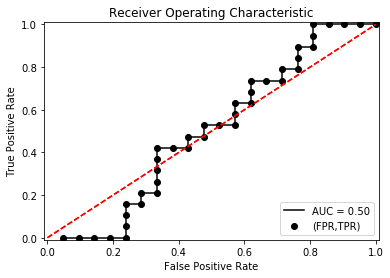

In [64]:
from sklearn.metrics import auc
AUC= auc(TPRandFPR['FP'],TPRandFPR['TP'])

plt.scatter(x=TPRandFPR['FP'],y=TPRandFPR['TP'],label='(FPR,TPR)',color='k')
plt.plot(TPRandFPR['FP'], TPRandFPR['TP'], 'k',label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')

plt.title('Receiver Operating Characteristic')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
